In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "dubbo"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Job executions per month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby(actions.month).agg({"jobhours":["sum","mean", "max", "count"]})

jobhours                           
                 sum      mean        max count
month                                          
2021-02   918.067222  1.319062   6.003333   696
2021-03  1815.491389  1.537249  11.023889  1181

## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                     
                                  sum      mean        max
repo                                                      
dubbo-samples              958.185278  4.863885  11.023889
dubbo                      796.099444  1.777008   3.847222
dubbo-go                    28.423611  0.163354   0.378333
dubbo-admin                  9.348611  0.106234   0.175000
dubbo-go-samples             7.561389  0.087923   0.211944
dubbo-go-pixiu               5.418889  0.080879   0.129444
dubbo-js                     5.222500  0.168468   0.263056
dubbo-go-hessian2            2.598056  0.063367   0.077778
dubbo-spring-boot-project    2.248889  0.107090   0.166111
dubbo-spi-extensions         0.181944  0.036389   0.041944
dubbo-website                0.170278  0.008108   0.018333
dubbo-getty                  0.032500  0.016250   0.016667

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours                     
                                             sum      mean        max
repo                      workflowid                                 
dubbo                     5030221     614.791944  1.921225   3.847222
dubbo-samples             4984881     609.185556  9.825573  11.016944
                          4984882     267.144722  4.308786  11.023889
dubbo                     5305015     179.276944  1.506529   2.209444
dubbo-samples             4957779      48.513889  1.311186   2.336111
                          4957778      33.341111  0.926142   1.316111
dubbo-go                  2552611      24.876389  0.153558   0.294167
dubbo-go-samples          3908672       7.561389  0.087923   0.211944
dubbo-go-pixiu            2608526       5.418889  0.080879   0.129444
dubbo-js                  4592719       5.222500  0.168468   0.263056
dubbo-admin               1773744       5.003611  0.113718   0.128333
                          1147905       4.345000  0.098750   0.175000
dubbo-go                  3356593       3.547222  0.295602   0.378333
dubbo-go-hessian2         2669456       2.598056  0.063367   0.077778
dubbo                     6382902       2.030556  0.225617   0.316667
dubbo-spring-boot-project 5270903       1.656667  0.110444   0.166111
                          5270902       0.592222  0.098704   0.139444
dubbo-spi-extensions      5555292       0.181944  0.036389   0.041944
dubbo-website             3641825       0.170278  0.008108   0.018333
dubbo-getty               3301821       0.032500  0.016250   0.016667

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
591299,apache,dubbo-samples,627809355,95,2021-03-06 18:23:48+00:00,2021-03-07 00:25:42+00:00,completed,failure,4984882,2021-03-06 18:23:59+00:00,2021-03-07 00:25:33+00:00,True,16,39686,dubbo,11.023889,2021-03
591012,apache,dubbo-samples,706356856,146,2021-03-31 21:02:37+00:00,2021-03-31 22:36:59+00:00,completed,failure,4984881,2021-03-31 21:04:47+00:00,2021-03-31 22:36:49+00:00,True,16,39661,dubbo,11.016944,2021-03
591004,apache,dubbo-samples,695603216,139,2021-03-28 18:09:59+00:00,2021-03-28 19:31:19+00:00,completed,failure,4984881,2021-03-28 18:10:08+00:00,2021-03-28 19:31:08+00:00,True,16,39654,dubbo,11.015000,2021-03
591009,apache,dubbo-samples,702393110,143,2021-03-30 18:10:44+00:00,2021-03-30 20:03:23+00:00,completed,failure,4984881,2021-03-30 18:11:05+00:00,2021-03-30 20:03:14+00:00,True,16,39504,dubbo,10.973333,2021-03
591010,apache,dubbo-samples,702824961,144,2021-03-30 21:02:23+00:00,2021-03-30 22:41:57+00:00,completed,failure,4984881,2021-03-30 21:02:44+00:00,2021-03-30 22:41:47+00:00,True,16,39444,dubbo,10.956667,2021-03
591011,apache,dubbo-samples,705924226,145,2021-03-31 18:10:10+00:00,2021-03-31 19:45:59+00:00,completed,failure,4984881,2021-03-31 18:10:38+00:00,2021-03-31 19:45:50+00:00,True,16,39404,dubbo,10.945556,2021-03
590982,apache,dubbo-samples,665475474,119,2021-03-18 18:03:58+00:00,2021-03-18 19:58:10+00:00,completed,failure,4984881,2021-03-18 18:04:21+00:00,2021-03-18 19:58:00+00:00,True,16,39333,dubbo,10.925833,2021-03
590987,apache,dubbo-samples,671359593,123,2021-03-20 18:05:03+00:00,2021-03-20 19:26:59+00:00,completed,failure,4984881,2021-03-20 18:05:10+00:00,2021-03-20 19:26:50+00:00,True,16,39325,dubbo,10.923611,2021-03
591008,apache,dubbo-samples,699237755,142,2021-03-29 21:02:27+00:00,2021-03-29 22:45:24+00:00,completed,failure,4984881,2021-03-29 21:02:55+00:00,2021-03-29 22:45:14+00:00,True,16,39291,dubbo,10.914167,2021-03
590993,apache,dubbo-samples,680525990,129,2021-03-23 18:06:29+00:00,2021-03-23 19:52:11+00:00,completed,failure,4984881,2021-03-23 18:07:00+00:00,2021-03-23 19:52:01+00:00,True,16,39266,dubbo,10.907222,2021-03


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
9,apache,dubbo,Unit Test On windows-2019 (JDK: 11),285.478611
10,apache,dubbo,Unit Test On windows-2019 (JDK: 8),268.788889
71,apache,dubbo-samples,"Integration Test (Java11, Job5)",217.858611
70,apache,dubbo-samples,"Integration Test (Java11, Job4)",215.950833
75,apache,dubbo-samples,"Integration Test (Java8, Job4)",208.508889
76,apache,dubbo-samples,"Integration Test (Java8, Job5)",204.775833
68,apache,dubbo-samples,"Integration Test (Java11, Job2)",199.111389
7,apache,dubbo,Unit Test On ubuntu-18.04 (JDK: 11),196.175278
73,apache,dubbo-samples,"Integration Test (Java8, Job2)",190.405556
67,apache,dubbo-samples,"Integration Test (Java11, Job1)",187.530000


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
3,apache,dubbo,success,5670
20,apache,dubbo-samples,failure,3782
1,apache,dubbo,failure,2262
22,apache,dubbo-samples,success,2248
18,apache,dubbo-js,failure,724
6,apache,dubbo-admin,success,245
2,apache,dubbo,skipped,198
9,apache,dubbo-go,failure,198
10,apache,dubbo-go,success,184
17,apache,dubbo-go-samples,success,135


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

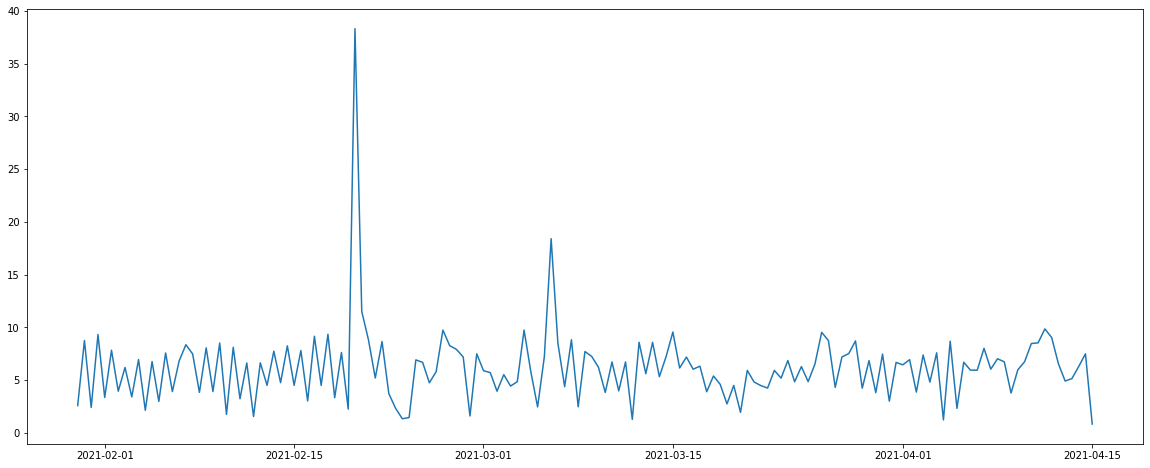

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

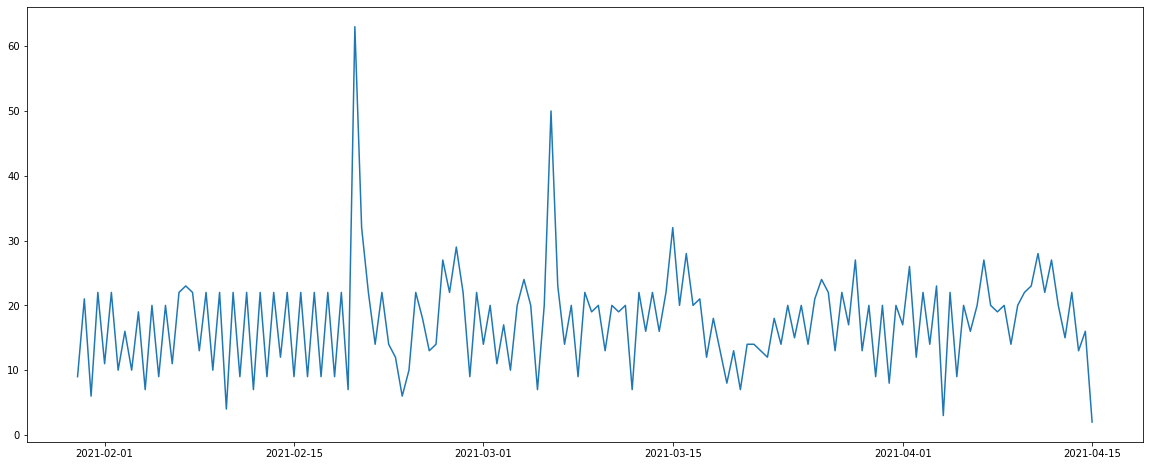

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()